In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)


In [2]:
mnist.keys()

for index, key in enumerate(mnist):
    print(key, type(mnist[key]))

print(mnist['DESCR'])

data <class 'numpy.ndarray'>
target <class 'numpy.ndarray'>
feature_names <class 'list'>
DESCR <class 'str'>
details <class 'dict'>
categories <class 'dict'>
url <class 'str'>
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their as

In [3]:
import numpy as np

x,y = mnist['data'], mnist['target']
y = y.astype(np.uint8) # convert strings in y to ints
x.shape
type(x)
x.shape


(70000, 784)

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

digit = x[5]
digit_pix = digit.reshape(28, 28)
plt.imshow(digit_pix, cmap = mpl.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

digit_label = y[5]
digit_label

<Figure size 640x480 with 1 Axes>

2

In [5]:
x_train, x_test, y_train, y_test = x[:60000,:], x[60000:,:], y[:60000], y[60000:]
# x[:60000, : ] means all columns, rows from start to 60000-1

In [6]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
y_test_5

array([False, False, False, ..., False,  True, False])

In [7]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state = 42)
sgd.fit(x_train, y_train_5)
sgd.predict([x[5]]) # why did we give it an input as a list?

/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([False])

In [8]:
# Implementing Cross-Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


str_k_fold = StratifiedKFold(n_splits = 3, random_state = 49)
for train_index, test_index in str_k_fold.split(x_train, y_train_5):
    sgd = clone(sgd)
    sgd.fit(x_train[train_index], y_train_5[train_index])
    predictions = sgd.predict(x_train[test_index])
    predictions = np.array(predictions)
    
    # Alternative/difficult approach
    #wrong_predictions = sum(predictions ^ y_train_5[test_index])
    #tpr = sum(predictions & y_train_5[test_index]) # true positive rate
    #print('Wrong predictions: {}/{} \n TP: {}/{}'.format(wrong_predictions,len(test_index), tpr, sum(y_train_5[test_index])))
    
    # Book approach
    corr_pred = sum(predictions == y_train_5[test_index])
    print(corr_pred/len(predictions))

/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9532


/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.95125


/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9625


In [9]:
# The dumb classifier

from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score

class DumbClassifier(BaseEstimator):
    def fit(self, x, y):
        pass
    def predict(self, x):
        return (np.zeros( shape= (len(x),1), dtype = bool))
    
dc = DumbClassifier()
dc.fit(x_train, y_train_5)
dc.predict(x_train)
scores = cross_val_score(dc, x_train, y_train_5, cv=3, scoring='accuracy')
scores

array([0.91125, 0.90855, 0.90915])

In [10]:
from sklearn.model_selection import cross_val_predict

sgd = clone(sgd)
y_train_predict = cross_val_predict(sgd, x_train, y_train_5, cv =3)
# The x_train data is divided in such a way that Each sample belongs to exactly one test set, 
# therefore we get one prediction for each instance
print(y_train_predict.shape) 


/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

(60000,)


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

matrix = confusion_matrix(y_train_5, y_train_predict)
precision = precision_score(y_train_5, y_train_predict)
recall = recall_score(y_train_5, y_train_predict)
f1 = f1_score(y_train_5, y_train_predict)
print('precision {}, recall {} \nconfusion matrix {}\nf1 score {}'.format(precision, recall, matrix, f1))

precision 0.7325581395348837, recall 0.8018815716657444 
confusion matrix [[52992  1587]
 [ 1074  4347]]
f1 score 0.765653896961691


/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.0 2697556.43706446
0.0 1.0
[0.73060376 0.58078111 0.53215486 ... 0.7903675  0.67575519 0.67403837]


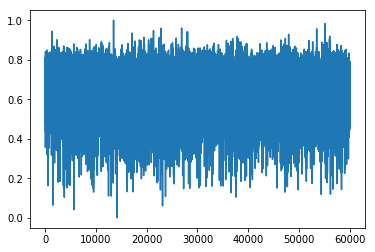

For threshold: 0.2, Precision: 9.044949444388827, Recall: 100.0
For threshold: 0.3, Precision: 9.072651503740522, Recall: 100.0
For threshold: 0.4, Precision: 9.17821212018563, Recall: 99.96310643792658
For threshold: 0.5, Precision: 9.739334355551547, Recall: 99.59417081719239
For threshold: 0.6, Precision: 13.676586846198965, Recall: 98.93008669987087
For threshold: 0.7, Precision: 59.004149377593365, Recall: 91.80962921970116
For threshold: 0.8, Precision: 98.32893579595427, Recall: 20.623501199040767
For threshold: 0.9, Precision: 100.0, Recall: 0.5165098690278546


In [12]:
sgd.fit(x_train, y_train_5)
y_train_prob = sgd.decision_function(x_train)

# Plot the values of y_train_prob to analyze the values
y_train_prob = y_train_prob + abs(min(y_train_prob)) # to shift the entire data right so that all numbers are non-negative
print(min(y_train_prob),max(y_train_prob))
y_train_prob = y_train_prob/max(y_train_prob) # convert the values into range 0-1
print(min(y_train_prob),max(y_train_prob))
print(y_train_prob)
x_axis = np.arange(len(y_train_prob))

plt.plot(x_axis, y_train_prob)
plt.show()

# Check the variation in precision and recall w.r.t threshold
thresh = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for th in thresh:
    y_train_pred = (y_train_prob > th)
    print('For threshold: {}, Precision: {}, Recall: {}'.format(th, precision_score(y_train_5, y_train_pred)*100,recall_score(y_train_5, y_train_pred)*100))

In [13]:
y_train_scores = cross_val_predict(sgd, x_train, y_train_5, cv = 3, method = 'decision_function')
print(y_train_scores)

/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

[ 130454.39322866 -292310.89416081 -851504.62149277 ...  361078.59565149
 -432547.19353153 -420755.44332381]


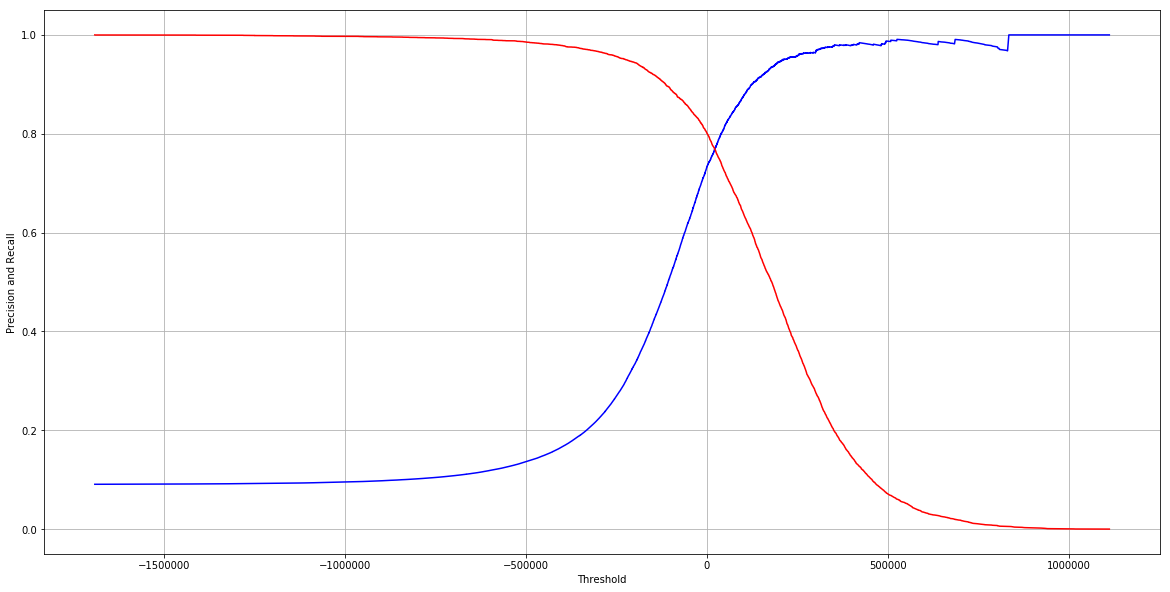

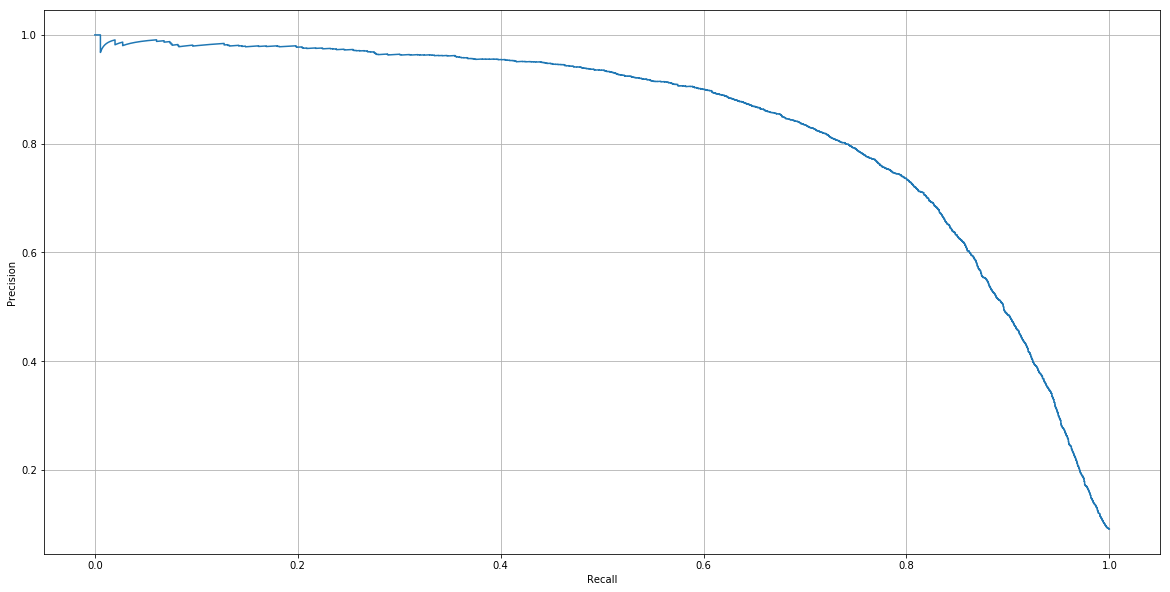

In [14]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_train_scores)
plt.figure(figsize=(20,10))
plt.plot(thresholds, precisions[:-1], 'b', label='precision') # precision co-varies with threshold
plt.plot(thresholds, recalls[:-1], 'r', label='recall')
plt.axis('on')
plt.xlabel('Threshold')
plt.ylabel('Precision and Recall')
plt.grid()
plt.show()
plt.figure(figsize=(20,10))
plt.plot(recalls, precisions, label ='precision vs recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()


In [15]:
prec = (precisions >= 0.90) # finding the the index of the first True
max_index = np.argmax(prec) # == 56054
threshold_90_precision = thresholds[max_index]
y_train_pred = (y_train_scores >= threshold_90_precision)
prec = precision_score(y_train_5, y_train_pred)*100
recall = recall_score(y_train_5, y_train_pred)*100
print('For threshold: {}, Precision: {}, Recall: {}'.format(threshold_90_precision, prec,recall))

For threshold: 124997.76937872983, Precision: 90.0, Recall: 59.933591588267845


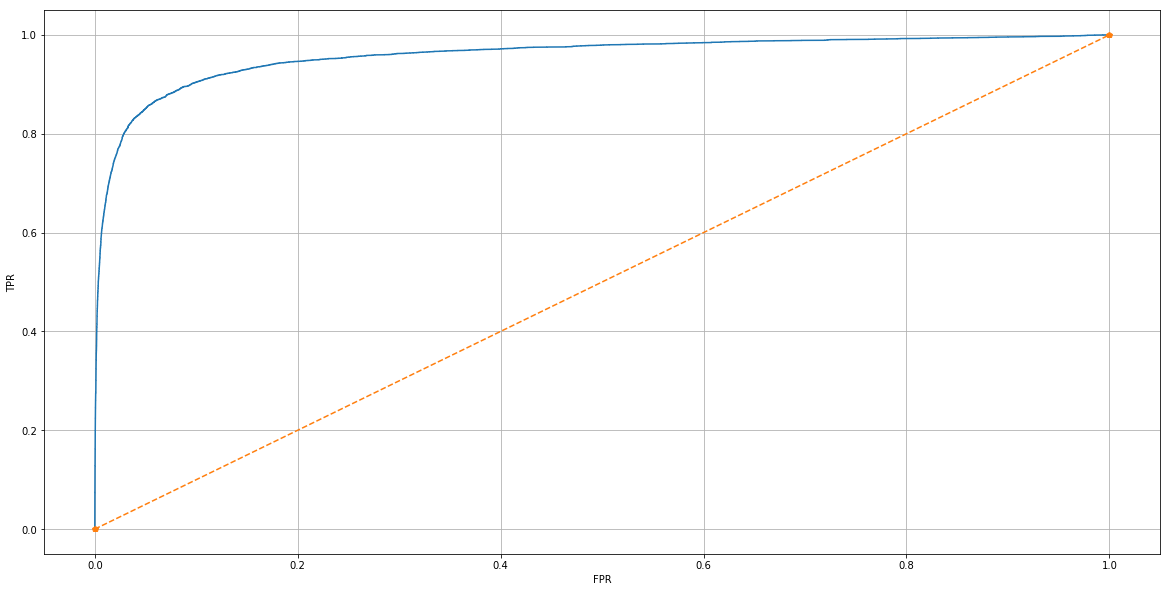

In [16]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_train_5,y_train_scores)
plt.figure(figsize=(20,10))
plt.plot( fprs,tprs, label = 'Reciever Operating Curve')
plt.plot([0,1],[0,1], 'p--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()

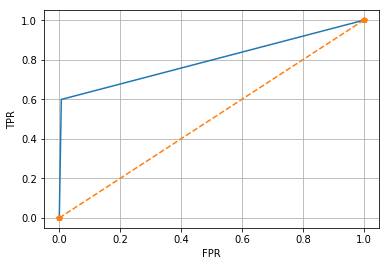

In [17]:
# Lets build a random classifier and check its ROC curve

from sklearn.base import BaseEstimator

class RandomClassifier(BaseEstimator):
    def fit(self, x, y):
        pass
    def predict(self, x):
        return np.random.choice([True, False], size=len(x))
    def decision_function(self, x):
        return np.floor((np.random.rand(len(x)))*100000)

rand_class = RandomClassifier()
rand_class.fit(x_train, y_train_5)
y_train_score = rand_class.decision_function(x_train)
fprs, tprs, thresholds = roc_curve(y_train_5, y_train_pred)
plt.plot(fprs,tprs)
plt.plot([0,1],[0,1], 'p--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()

/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will 

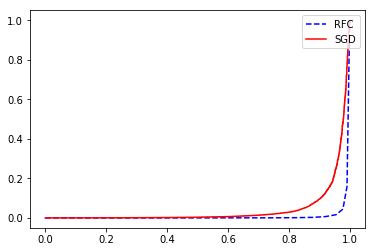

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train_5)
rfc_prob = cross_val_predict(rfc, x_train, y_train_5, cv=3, method ='predict_proba')
rfc_scores = rfc_prob[:,1]
sgd.fit(x_train, y_train_5)
sgd_scores = cross_val_predict(sgd, x_train, y_train_5, cv=3, method ='decision_function')
rfc_fpr, rfc_tpr, rfc_thresh = roc_curve(y_train_5, rfc_scores)
sgd_fpr, sgd_tpr, sgd_thresh = roc_curve(y_train_5, sgd_scores)

plt.plot(rfc_tpr, rfc_fpr, 'b--', label='RFC')
plt.plot(sgd_tpr, sgd_fpr, 'r', label ='SGD')
plt.legend(loc='upper right')
plt.show()


In [19]:
sgd.fit(x_train, y_train)
print(sgd.predict([x_train[10]]))
print(y_train[10])
scores = sgd.decision_function([x_train[10]])
max_score = np.argmax(scores)
classes = sgd.classes_
classes[max_score]

/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


[3]
3


3

In [20]:
from sklearn.multiclass import OneVsOneClassifier

sgd_ovo = OneVsOneClassifier(SGDClassifier(random_state=42))
sgd_ovo.fit(x_train, y_train)
sgd_ovo.predict([x_train[10]])

/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

array([3], dtype=uint8)

In [21]:
sgd_ovo.decision_function([x_train[10]])
sgd_ovo.estimators_

(SGDClassifier(alpha=0.0001, average=False, class_weight=None,
        early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
        l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
        n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
        power_t=0.5, random_state=42, shuffle=True, tol=None,
        validation_fraction=0.1, verbose=0, warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
        early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
        l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
        n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
        power_t=0.5, random_state=42, shuffle=True, tol=None,
        validation_fraction=0.1, verbose=0, warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
        early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
        l1_ratio=0.15, learning_rate='optimal', loss

In [22]:
print(cross_val_score(sgd, x_train, y_train, cv=3, scoring="accuracy"))
y_train_pred = cross_val_predict(sgd, x_train, y_train, cv=3)
conf_mat = confusion_matrix(y_train, y_train_pred)

/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

[0.86872625 0.87639382 0.87848177]


/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

In [23]:
conf_mat_cp = conf_mat # most problametic digits here are 2,3,8,9
conf_mat

array([[5740,    4,   36,   17,   10,   30,   36,    5,   40,    5],
       [   1, 6393,   46,   72,    7,   62,    5,   14,  123,   19],
       [  51,   58, 5216,  149,   41,   42,   73,   49,  254,   25],
       [  47,   38,  300, 5069,   18,  317,   28,   51,  158,  105],
       [  14,   28,   83,   18, 5249,   12,   46,   20,   72,  300],
       [  83,   24,   71,  194,   90, 4442,  119,   25,  250,  123],
       [  72,   16,  152,   17,   63,   92, 5420,    5,   74,    7],
       [  31,   36,  122,   58,  104,   36,    2, 5353,   37,  486],
       [  79,  205,  169,  163,  117,  355,   40,   28, 4517,  178],
       [  42,   46,   46,   93,  338,   96,    1,  134,   80, 5073]])

In [24]:
row_sum = conf_mat_cp.sum(axis=1)
row_sum # 1 has highest number of training images
# 6, 8 and 5 have the lowest number

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

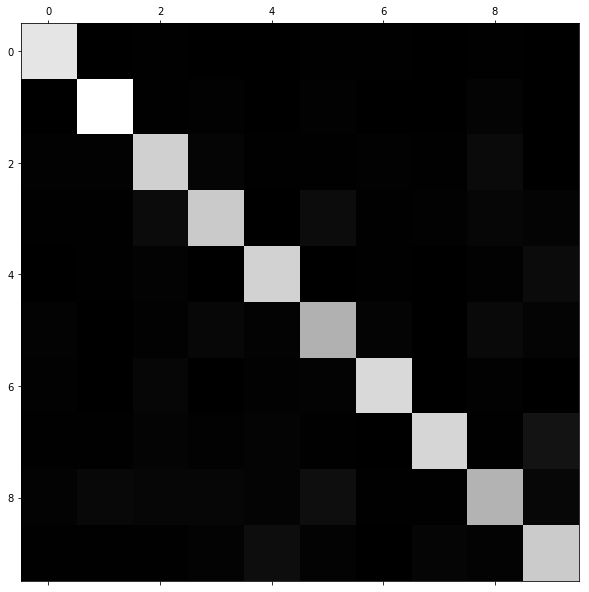

In [25]:
plt.figure(figsize=(10,15))
plt.matshow(conf_mat, cmap = plt.cm.gray, fignum=1)
plt.show()

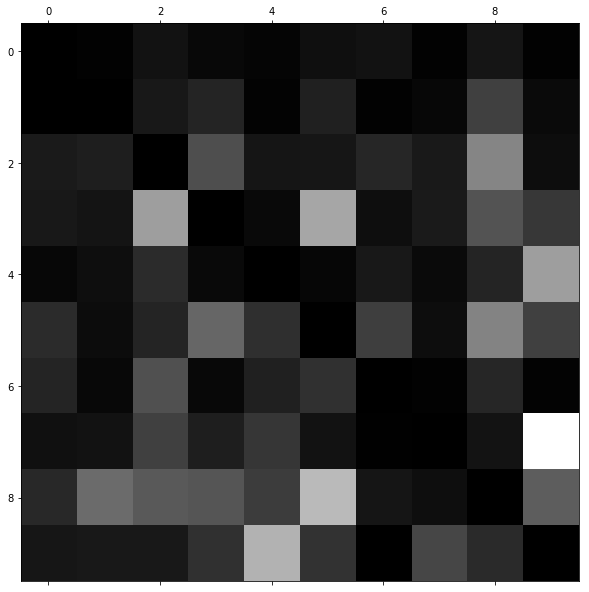

In [26]:
# Let's try to remove the elements at the diagonal, so that other elements are more visible
np.fill_diagonal(conf_mat_cp,0) # diagonal is filled with 0s
row_sum = conf_mat_cp.sum(axis=1)
plt.figure(figsize=(10,15))
plt.matshow(conf_mat_cp, cmap = plt.cm.gray, fignum=1)
plt.show()

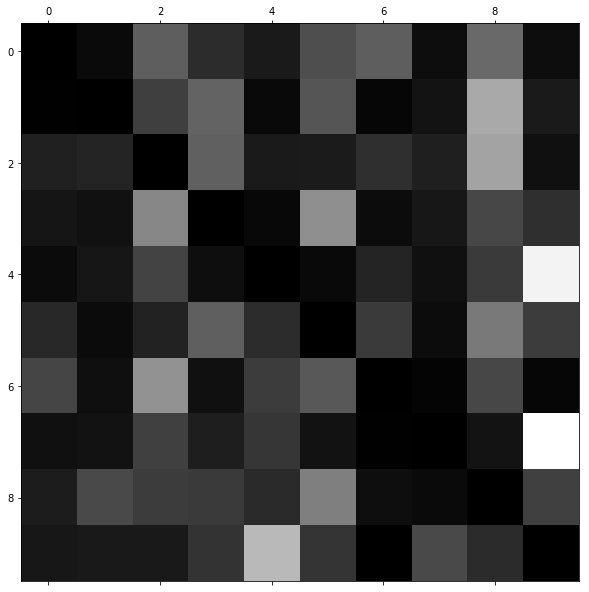

In [27]:
scaled_conf_mat = (conf_mat_cp/row_sum[:, None])*1000
plt.figure(figsize=(10,15))
plt.matshow(scaled_conf_mat, cmap = plt.cm.gray, fignum=1)
plt.show()
# 2,5, 8, 9 are bad performing

In [28]:
# COPIED FROM https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

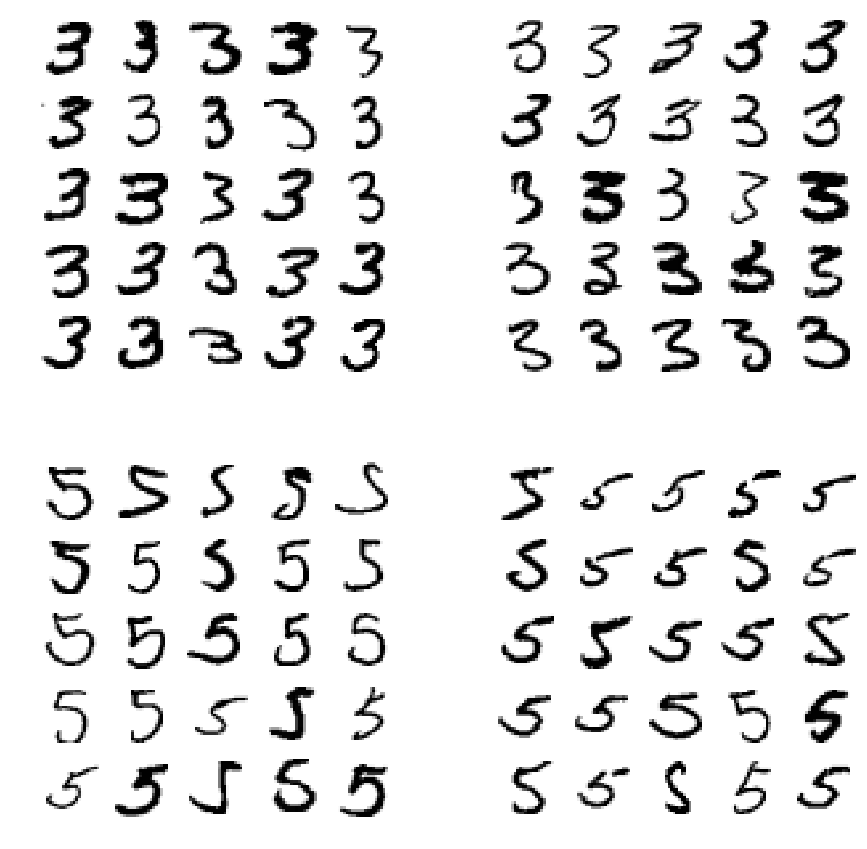

In [29]:
cl_a, cl_b = 3, 5
x_aa = x_train[(y_train==3)&(y_train_pred==3)]
x_ab = x_train[(y_train==3)&(y_train_pred==5)]
x_ba = x_train[(y_train==5)&(y_train_pred==3)]
x_bb = x_train[(y_train==5)&(y_train_pred==5)]


plt.figure(figsize = (15,15))
plt.subplot(221); plot_digits(x_aa[:25], images_per_row =5)
plt.subplot(222); plot_digits(x_ab[:25], images_per_row =5)
plt.subplot(223); plot_digits(x_ba[:25], images_per_row =5)
plt.subplot(224); plot_digits(x_bb[:25], images_per_row =5)

plt.show()

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# make a multi-label training data
y_large = (y_train >=7)
y_odd = (y_train%2==1)
y_multilabel = np.c_[y_large, y_odd]
y_multilabel

kneighbor_clf = KNeighborsClassifier()
kneighbor_clf.fit(x_train, y_multilabel)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
kneighbor_clf.predict([x_train[5]])

y_multilabel_pred = cross_val_predict(kneighbor_clf, x_train, y_multilabel, cv=3, method='predict')
print(f1_score(y_multilabel_pred, y_multilabel, average='macro')) # average the f1 score for each label


0.976410265560605


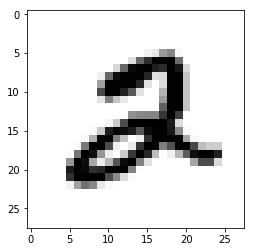

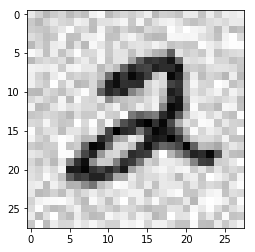

In [44]:
import matplotlib as mpl
import matplotlib.pyplot as plt

noise = np.random.randint(0,100, (len(x_train), 28*28))
x_train_mod = x_train + noise
noise = np.random.randint(0,100, (len(x_test), 28*28))
x_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test


digit = x_train[5]
digit_pix = digit.reshape(28,28)
plt.imshow(digit_pix, cmap = mpl.cm.binary, interpolation='nearest')
plt.show()
digit = x_train_mod[5]
digit_pix = digit.reshape(28,28)
plt.imshow(digit_pix, cmap =mpl.cm.binary, interpolation = 'nearest')
plt.show()

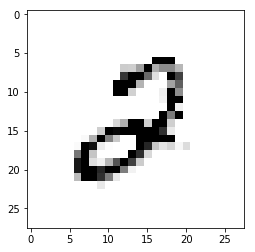

In [43]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_mod, y_train_mod)
pred_digit = knn_clf.predict([x_train_mod[5]])
pred_digit_pix = pred_digit.reshape(28,28)
plt.imshow(pred_digit_pix,cmap = mpl.cm.binary, interpolation='nearest')
plt.show()